# Visualisasi Data & Model Tingkat Kepuasan Pelanggan Restoran

### Disusun oleh:
__M. Iqbal Nurrifki__        (5003221061)<br>
__Rafdhi Fatoni Septiyanto__ (5003221079)<br>
__Rasendra Akbar Satyatama__ (5003221120)<br>
S1 - __Statistika__<br>
Institut Teknologi Sepuluh Nopember<br>
Surabaya<br>

-----------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## I. Permasalahan:
- Bagaimana frekuensi waktu kunjungan pelanggan untuk memahami jam makan paling ramai?
- Bagaimana karakteristik demografis pelanggan yang lebih sering mengunjungi restoran secara berkala?
- Bagaimana pengeluaran rata-rata per kunjungan terkait dengan jenis masakan yang disukai?
- Apakah anggota program loyalitas memiliki kecenderungan untuk memberikan rating yang lebih tinggi?
- Bagaimana penilaian layanan, makanan, dan suasana restoran berpengaruh terhadap tingkat kepuasan pelanggan secara keseluruhan?
- Bagaimana memprediksi kepuasan pelanggan berdasarkan variabel-variabel yang relevan?

## II. Data & Identifikasi Variabel:

_Sumber data_ : https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset

In [3]:
data = pd.read_csv("restaurant_customer_satisfaction.csv")
data.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


__Informasi Demografi__<br>
- CustomerID: ID unik untuk setiap pelanggan.
- Age: Usia pelanggan.
- Gender: Jenis kelamin pelanggan (Pria/Wanita).
- Income: Pendapatan tahunan pelanggan dalam USD.

__Variabel Terkait Kunjungan__<br>
- VisitFrequency: Seberapa sering pelanggan mengunjungi restoran (Harian, Mingguan, Bulanan, Jarang).
- AverageSpend: Rata-rata jumlah uang yang dihabiskan pelanggan per kunjungan dalam USD.
- PreferredCuisine: Jenis makanan yang paling disukai pelanggan (Italia, China, India, Meksiko, Amerika).
- TimeOfVisit: Waktu kunjungan pelanggan (Sarapan, Makan Siang, Makan Malam).
- GroupSize: Jumlah orang dalam grup pelanggan saat berkunjung.
- DiningOccasion: Alasan pelanggan makan di restoran (Santai, Bisnis, Perayaan).
- MealType: Jenis makanan yang dipesan (Makan di tempat, Bawa pulang).
- OnlineReservation: Apakah pelanggan membuat reservasi online (0: Tidak, 1: Ya).
- DeliveryOrder: Apakah pelanggan memesan layanan antar (0: Tidak, 1: Ya).
- LoyaltyProgramMember: Apakah pelanggan anggota program loyalitas restoran (0: Tidak, 1: Ya).
- WaitTime: Waktu tunggu rata-rata bagi pelanggan (dalam menit).

__Penilaian Kepuasan__<br>
- ServiceRating: Penilaian pelanggan terhadap pelayanan (1-5).
- FoodRating: Penilaian pelanggan terhadap makanan (1-5).
- AmbianceRating: Penilaian pelanggan terhadap suasana restoran (1-5).
- HighSatisfaction: Apakah pelanggan merasa sangat puas (1: Ya, 0: Tidak)

### III. Data Pre-Processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

Terdapat 1500 data dengan 18 variabel pada dataset ini

#### Identifikasi _Missing Value_

In [5]:
data.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

Tidak terdapat _Missing Value_ pada tiap variabel

#### Identifikasi _Outliers_ pada data numerik

In [6]:
age = data['Age']
Income = data['Income']
AverageSpend = data['AverageSpend']
WaitTime = data['WaitTime']

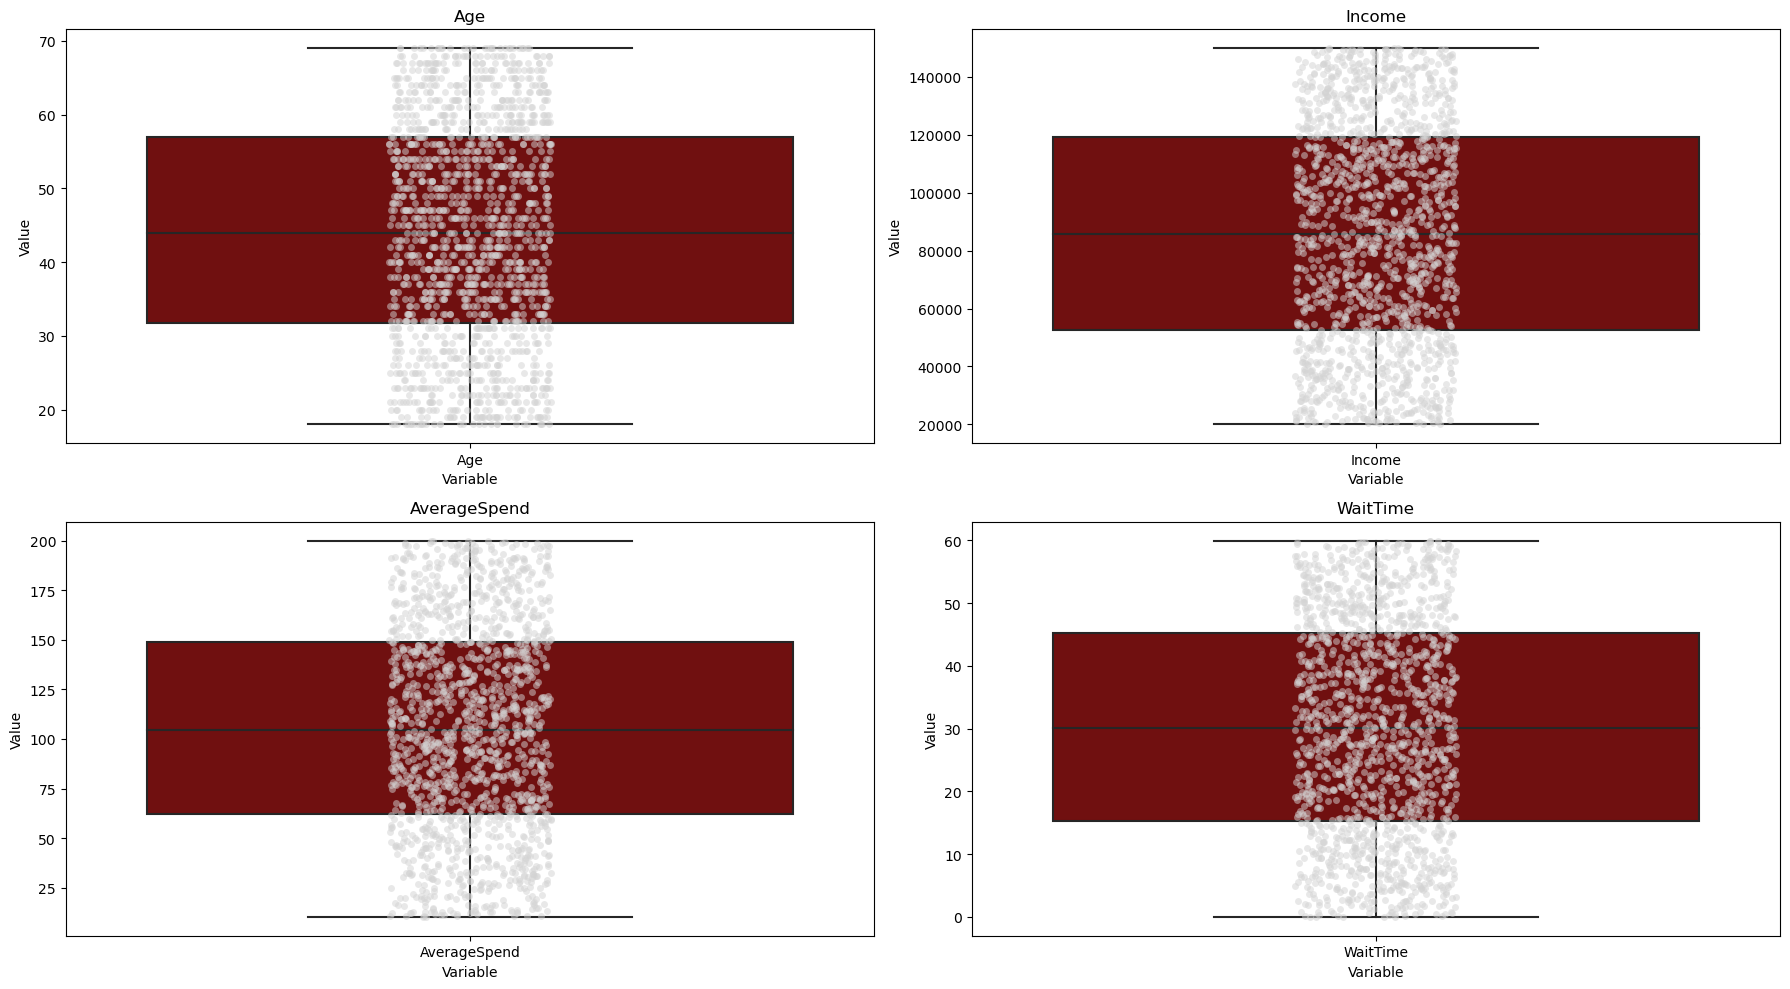

In [7]:
data_combined = pd.DataFrame({
    'Age': age,
    'Income': Income,
    'AverageSpend': AverageSpend,
    'WaitTime': WaitTime
})

data_melted = pd.melt(data_combined, var_name='Variable', value_name='Value')

fig, axs = plt.subplots(2, 2, figsize=(18, 10))  # 2 rows x 2 columns

variables = ['Age', 'Income', 'AverageSpend', 'WaitTime']
for i in range(len(variables)):
    var = variables[i]
    row = i // 2
    col = i % 2 
    sns.boxplot(x='Variable', y='Value', data=data_melted[data_melted['Variable'] == var], 
                ax=axs[row, col], color='maroon')
    sns.stripplot(x='Variable', y='Value', data=data_melted[data_melted['Variable'] == var], 
                  ax=axs[row, col], color='lightgrey', jitter=True, alpha=0.5)
    axs[row, col].set_title(var)

plt.tight_layout()
plt.show()

Secara visual boxplot, __Tidak ada outlier__ untuk variabel Age, Income, AverageSpend, dan WaitTime 

In [8]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Hitung IQR
    IQR = Q3 - Q1
    
    # Batas bawah dan batas atas untuk deteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mendapatkan data yang merupakan outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return len(outliers)

variables = ['Age', 'Income', 'AverageSpend', 'WaitTime']
# Iterasi ke setiap variabel dan hitung jumlah outlier
for var in variables:
    num_outliers = detect_outliers_iqr(data, var)
    print(f'Jumlah outlier pada {var}: {num_outliers}')


Jumlah outlier pada Age: 0
Jumlah outlier pada Income: 0
Jumlah outlier pada AverageSpend: 0
Jumlah outlier pada WaitTime: 0


## IV. Analisis Eksploratif

#### 4 a. Bagaimana frekuensi waktu kunjungan pelanggan untuk memahami jam makan paling ramai?

In [8]:
data['TimeOfVisit'].unique()

array(['Breakfast', 'Dinner', 'Lunch'], dtype=object)

<Axes: xlabel='TimeOfVisit', ylabel='count'>

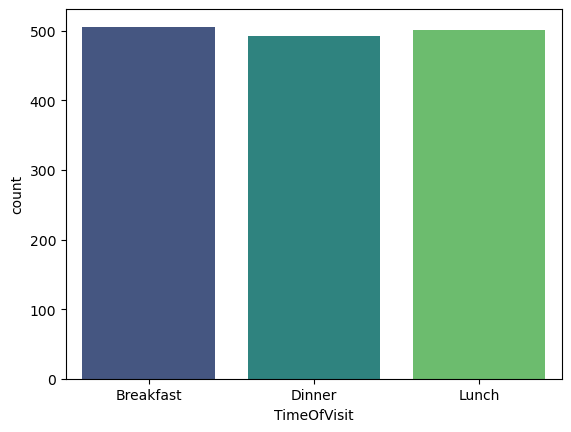

In [9]:
sns.countplot(x = 'TimeOfVisit', data = data, palette='viridis')

Berdasarkan grafik tersebut, frekuensi kunjungan tiap jam makan hampir __memiliki jumlah yang sama__

In [10]:
time_visit = data['TimeOfVisit']
print('Breakfast \t= ', (time_visit == 'Breakfast').sum())
print('Lunch \t\t= ', (time_visit == 'Lunch').sum())
print('Dinner \t\t= ', (time_visit == 'Dinner').sum())

Breakfast 	=  506
Lunch 		=  502
Dinner 		=  492


#### 4 b. Bagaimana karakteristik demografis pelanggan yang lebih sering mengunjungi restoran secara berkala?

_Membagi klasifikasi usia menjadi anak-anak, remaja, dan dewasa_

In [11]:
age_group = []

for i in data['Age']:
    if i <= 13:
        age_group.append('Anak-anak')
    elif i <= 24:
        age_group.append('Remaja')
    else:
        age_group.append('Dewasa')
        
age_group = pd.DataFrame(age_group)
        
age_group_counts = age_group.value_counts()
age_group_counts

Dewasa    1297
Remaja     203
Name: count, dtype: int64

In [12]:
age_group[0].unique()

array(['Dewasa', 'Remaja'], dtype=object)

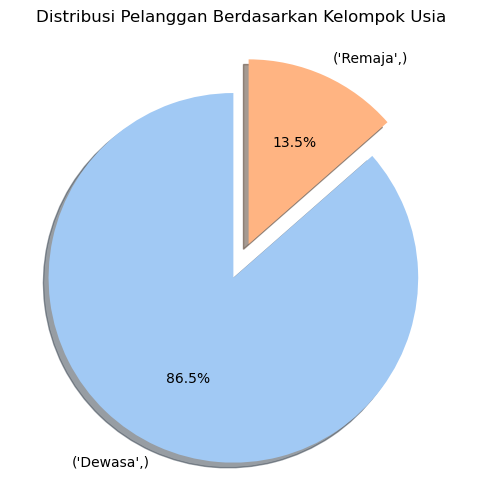

In [13]:
plt.figure(figsize=(6, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('pastel'), explode=[0.1, 0.1], shadow=True)

plt.title('Distribusi Pelanggan Berdasarkan Kelompok Usia')
plt.show()

Pelanggan dengan rentang usia ketagori dewasa pada restoran tersebut lebih banyak daripada rentang usia remaja

#### 4 c. Bagaimana pengeluaran rata-rata per kunjungan terkait dengan jenis masakan yang disukai?

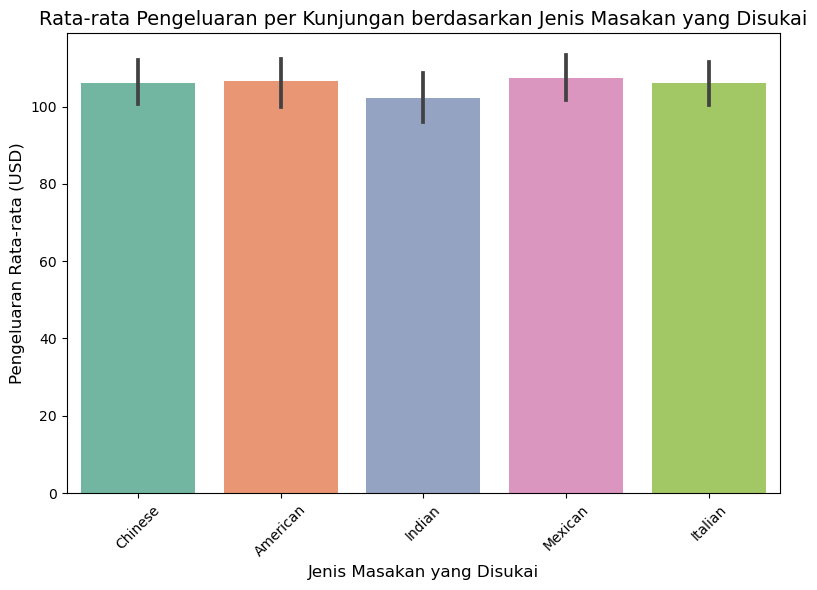

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='PreferredCuisine', y='AverageSpend', data=data, palette='Set2')

plt.title('Rata-rata Pengeluaran per Kunjungan berdasarkan Jenis Masakan yang Disukai', fontsize=14)
plt.xlabel('Jenis Masakan yang Disukai', fontsize=12)
plt.ylabel('Pengeluaran Rata-rata (USD)', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Rata-rata pengeluaran pada tiap jenis makanan pada restoran tersebut hampir sama rata walaupun jenis makanan Indian terlihat paling rendah secara visual, namun tidak terlalu jauh gap diantara lainnya.

#### 4 d. Apakah anggota program loyalitas memiliki kecenderungan untuk memberikan rating yang lebih tinggi?

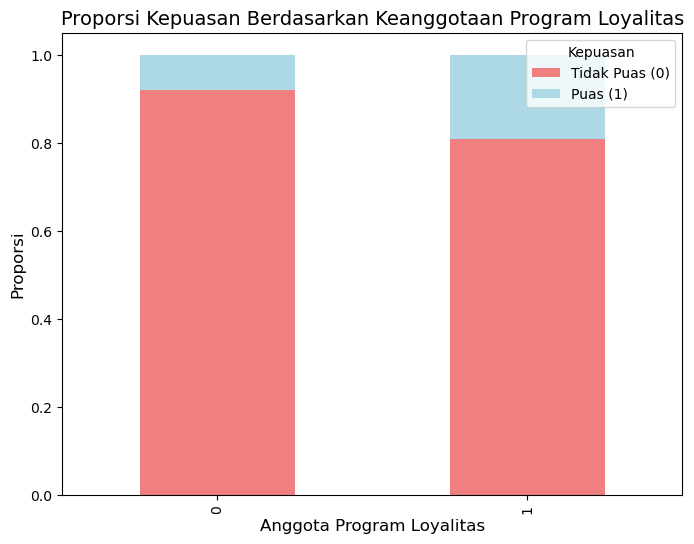

In [15]:
satisfaction_counts = data.groupby(['LoyaltyProgramMember', 'HighSatisfaction']).size().unstack()

satisfaction_prop = satisfaction_counts.div(satisfaction_counts.sum(axis=1), axis=0)

satisfaction_prop.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], figsize=(8, 6))

plt.title('Proporsi Kepuasan Berdasarkan Keanggotaan Program Loyalitas', fontsize=14)
plt.xlabel('Anggota Program Loyalitas', fontsize=12)
plt.ylabel('Proporsi', fontsize=12)
plt.legend(['Tidak Puas (0)', 'Puas (1)'], title='Kepuasan', loc='upper right')

plt.show()

Stacked bar plot di atas dapat  mengindikasikan bahwa program loyalitas dapat meningkatkan tingkat kepuasan pelanggan. Pelanggan yang merasa menjadi bagian dari program ini cenderung lebih puas dengan produk atau layanan yang ditawarkan namun proporsi pelanggan yang merasa tidak puas untuk anggota program loyalitas maupun bukan masih tinggi.

#### 4 e. Bagaimana penilaian terhadap layanan, makanan, dan suasana restoran berpengaruh terhadap tingkat kepuasan pelanggan secara keseluruhan?

In [16]:
service_rating_counts = data['ServiceRating'].value_counts().sort_index()
food_rating_counts = data['FoodRating'].value_counts().sort_index()
ambiance_rating_counts = data['AmbianceRating'].value_counts().sort_index()

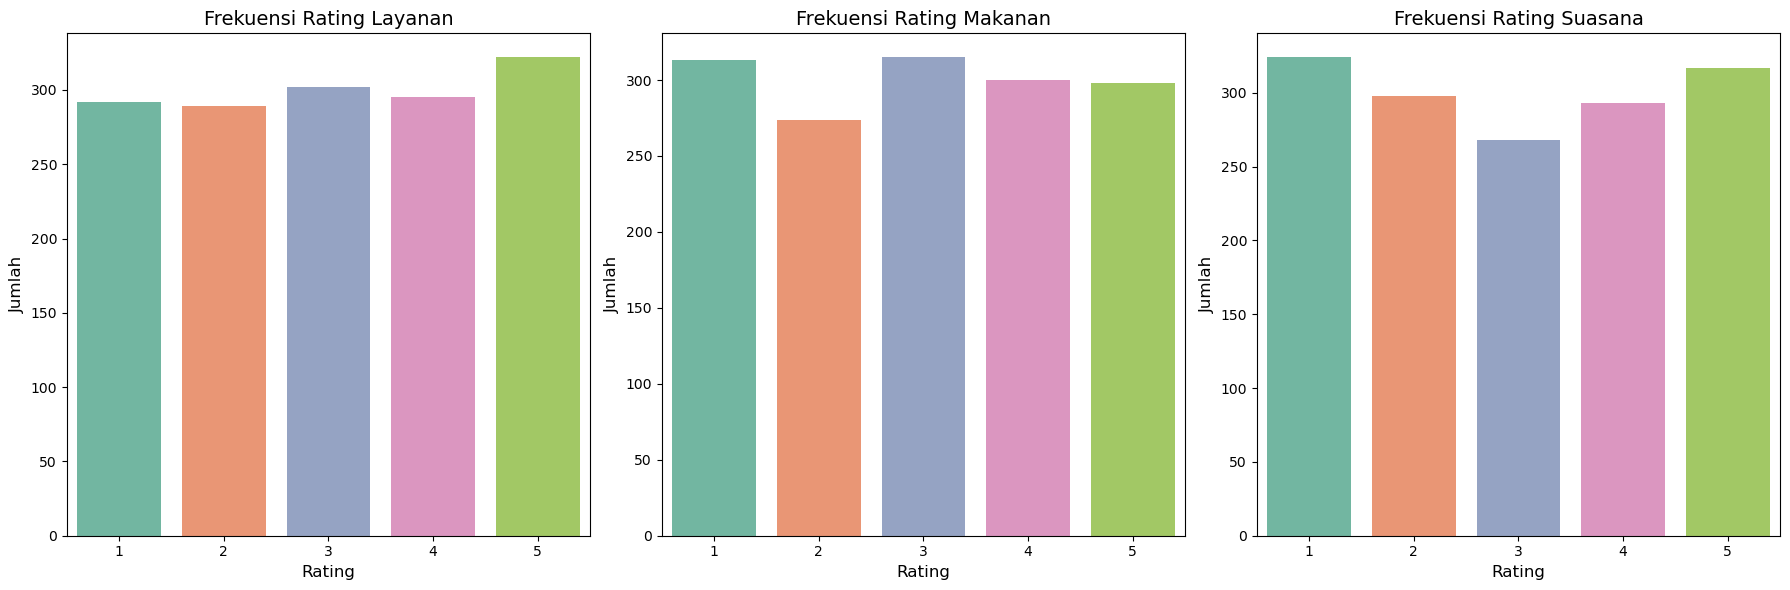

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=service_rating_counts.index, y=service_rating_counts.values, palette='Set2')
plt.title('Frekuensi Rating Layanan', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.subplot(1, 3, 2)
sns.barplot(x=food_rating_counts.index, y=food_rating_counts.values, palette='Set2')
plt.title('Frekuensi Rating Makanan', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.subplot(1, 3, 3)
sns.barplot(x=ambiance_rating_counts.index, y=ambiance_rating_counts.values, palette='Set2')
plt.title('Frekuensi Rating Suasana', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.tight_layout()
plt.show()

In [18]:
print("Frekuensi Rating Layanan:")
print(service_rating_counts)
print("\nFrekuensi Rating Makanan:")
print(food_rating_counts)
print("\nFrekuensi Rating Suasana:")
print(ambiance_rating_counts)

Frekuensi Rating Layanan:
ServiceRating
1    292
2    289
3    302
4    295
5    322
Name: count, dtype: int64

Frekuensi Rating Makanan:
FoodRating
1    313
2    274
3    315
4    300
5    298
Name: count, dtype: int64

Frekuensi Rating Suasana:
AmbianceRating
1    324
2    298
3    268
4    293
5    317
Name: count, dtype: int64


Berdasarkan grafik, terlihat bahwa restoran mendapatkan respon yang beragam dari pelanggan. Meskipun mayoritas pelanggan memberikan rating tinggi untuk layanan dan suasana, namun terdapat juga jumlah yang signifikan dari pelanggan yang memberikan rating rendah, terutama pada aspek makanan. Hal ini mengindikasikan bahwa restoran perlu melakukan evaluasi lebih mendalam terhadap kualitas makanan dan konsistensinya.

##### Analisis Korelasi Chi - Square Kontingensi

In [19]:
from scipy.stats import chi2_contingency

def chi_square_correlation(data, var1, var2, alpha=0.05):
    # Membuat tabel kontingensi
    contingency_table = pd.crosstab(data[var1], data[var2])
    
    # Melakukan uji chi-square
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    
    # Menentukan keputusan berdasarkan nilai p
    if p < alpha:
        conclusion = 'Signifikan (Ada hubungan yang signifikan antara variabel)'
    else:
        conclusion = 'Tidak Signifikan (Tidak ada hubungan yang signifikan antara variabel)'
    
    # Menampilkan hasil
    print(f'Uji Chi-Square antara {var1} dan {var2}:')
    print(f'Chi-square statistic: {chi2:.4f}')
    print(f'p-value: {p:.4f}')
    print(f'Derajat Kebebasan: {dof}')
    print(f'Tingkat Signifikansi (alpha): {alpha}')
    print(f'Keputusan: {conclusion}')

chi_square_correlation(data, 'ServiceRating', 'HighSatisfaction')
print("\n")
chi_square_correlation(data, 'FoodRating', 'HighSatisfaction')
print("\n")
chi_square_correlation(data, 'AmbianceRating', 'HighSatisfaction')

Uji Chi-Square antara ServiceRating dan HighSatisfaction:
Chi-square statistic: 17.9175
p-value: 0.0013
Derajat Kebebasan: 4
Tingkat Signifikansi (alpha): 0.05
Keputusan: Signifikan (Ada hubungan yang signifikan antara variabel)


Uji Chi-Square antara FoodRating dan HighSatisfaction:
Chi-square statistic: 49.0461
p-value: 0.0000
Derajat Kebebasan: 4
Tingkat Signifikansi (alpha): 0.05
Keputusan: Signifikan (Ada hubungan yang signifikan antara variabel)


Uji Chi-Square antara AmbianceRating dan HighSatisfaction:
Chi-square statistic: 20.1830
p-value: 0.0005
Derajat Kebebasan: 4
Tingkat Signifikansi (alpha): 0.05
Keputusan: Signifikan (Ada hubungan yang signifikan antara variabel)


###### Semua penilaian terhadap layanan, makanan, maupun suasana restoran berpengaruh terhadap tingkat kepuasan pelanggan secara keseluruhan

## V. Model Prediksi

#### 5 a. Memilih variabel-variabel yang relevan terhadap HighSatisfaction dengan Korelasi

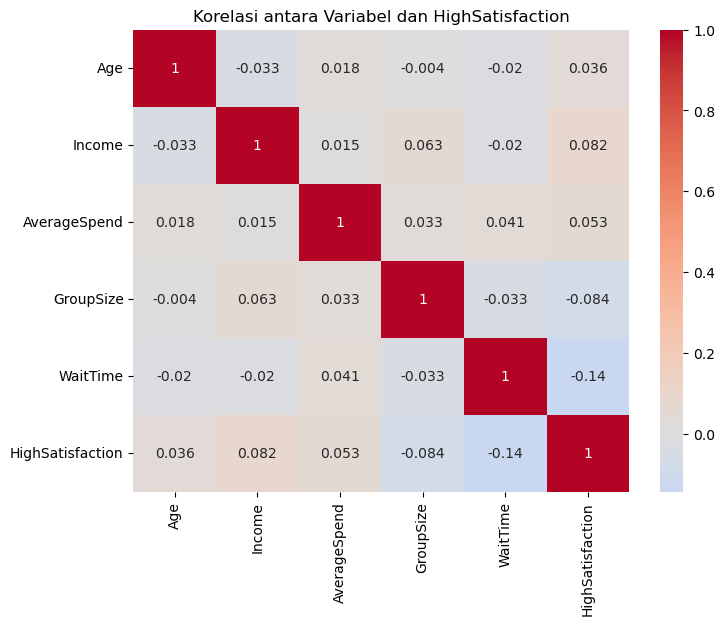

In [20]:
correlation_matrix = data[['Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime', 'HighSatisfaction']].corr()

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi antara Variabel dan HighSatisfaction')
plt.show()

In [21]:
from scipy.stats import chi2_contingency

def chi_square_test(data, categorical_var, target_var):
    contingency_table = pd.crosstab(data[categorical_var], data[target_var])
    
    # Melakukan uji chi-square
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Menentukan keputusan berdasarkan nilai p
    alpha = 0.05
    if p_val < alpha:
        conclusion = 'Signifikan: Ada hubungan yang signifikan antara variabel.'
    else:
        conclusion = 'Tidak Signifikan: Tidak ada hubungan yang signifikan antara variabel.'
    
    # Menampilkan hasil
    print(f'Uji Chi-Square antara {categorical_var} dan {target_var}:')
    print(f'Chi-Square Statistic: {chi2_stat:.4f}')
    print(f'p-value: {p_val:.4f}')
    print(f'Tingkat Signifikansi (alpha): {alpha}')
    print(f'Keputusan: {conclusion}')

# Eksekusi untuk variabel yang diberikan
chi_square_test(data, 'VisitFrequency', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'PreferredCuisine', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'TimeOfVisit', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'DiningOccasion', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'MealType', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'OnlineReservation', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'DeliveryOrder', 'HighSatisfaction')
print("\n")
chi_square_test(data, 'LoyaltyProgramMember', 'HighSatisfaction')


Uji Chi-Square antara VisitFrequency dan HighSatisfaction:
Chi-Square Statistic: 50.6303
p-value: 0.0000
Tingkat Signifikansi (alpha): 0.05
Keputusan: Signifikan: Ada hubungan yang signifikan antara variabel.


Uji Chi-Square antara PreferredCuisine dan HighSatisfaction:
Chi-Square Statistic: 2.1452
p-value: 0.7091
Tingkat Signifikansi (alpha): 0.05
Keputusan: Tidak Signifikan: Tidak ada hubungan yang signifikan antara variabel.


Uji Chi-Square antara TimeOfVisit dan HighSatisfaction:
Chi-Square Statistic: 0.7964
p-value: 0.6715
Tingkat Signifikansi (alpha): 0.05
Keputusan: Tidak Signifikan: Tidak ada hubungan yang signifikan antara variabel.


Uji Chi-Square antara DiningOccasion dan HighSatisfaction:
Chi-Square Statistic: 25.6715
p-value: 0.0000
Tingkat Signifikansi (alpha): 0.05
Keputusan: Signifikan: Ada hubungan yang signifikan antara variabel.


Uji Chi-Square antara MealType dan HighSatisfaction:
Chi-Square Statistic: 31.2319
p-value: 0.0000
Tingkat Signifikansi (alpha): 0.05
K

###### Berdasarkan hasil analisis korelasi di atas, variabel-variabel yang relevan dan akan digunakan untuk membuat model prediksi menurut hasil statisitik tersebut adalah
- WaitTime
- VisitFrequency
- DiningOccasion
- MealType
- OnlineReservation
- DeliveryOrder
- LoyaltyProgramMember
- ServiceRating
- FoodRating
- AmbianceRating

#### 5 b. Mengubah Data Kategorik menjadi Dummies

In [22]:
data_encoded = pd.get_dummies(data, columns=['VisitFrequency', 'DiningOccasion', 'MealType'], drop_first=False)
pd.DataFrame(data_encoded)

,CustomerID,Age,Gender,Income,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,OnlineReservation,DeliveryOrder,...,HighSatisfaction,VisitFrequency_Daily,VisitFrequency_Monthly,VisitFrequency_Rarely,VisitFrequency_Weekly,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration,MealType_Dine-in,MealType_Takeaway
0,654,35,Male,83380,27.829142,Chinese,Breakfast,3,0,1,...,0,False,False,False,True,True,False,False,False,True
1,655,19,Male,43623,115.408622,American,Dinner,1,0,0,...,0,False,False,True,False,False,True,False,True,False
2,656,41,Female,83737,106.693771,American,Dinner,6,0,1,...,0,False,False,False,True,False,False,True,True,False
3,657,43,Male,96768,43.508508,Indian,Lunch,1,0,0,...,0,False,False,True,False,False,False,True,True,False
4,658,55,Female,67937,148.084627,Chinese,Breakfast,1,0,0,...,0,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2149,39,Male,114857,163.015254,American,Lunch,2,0,1,...,0,False,True,False,False,True,False,False,True,False
1496,2150,37,Female,133506,190.991911,Italian,Lunch,4,0,0,...,0,False,False,False,True,False,True,False,False,True
1497,2151,46,Male,119159,150.088604,American,Lunch,4,0,1,...,1,False,True,False,False,False,True,False,True,False
1498,2152,24,Male,27970,196.363626,Italian,Dinner,6,1,1,...,1,False,False,False,True,False,True,False,True,False


#### 5 c. Data Splitting

In [23]:
from sklearn.model_selection import train_test_split
X = data_encoded[['WaitTime', 'VisitFrequency_Daily', 'VisitFrequency_Weekly', 'VisitFrequency_Monthly', 
                  'VisitFrequency_Rarely', 'DiningOccasion_Casual', 'DiningOccasion_Business', 
                  'DiningOccasion_Celebration', 'MealType_Dine-in', 'MealType_Takeaway', 
                  'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember', 
                  'ServiceRating', 'FoodRating', 'AmbianceRating']]
y = data_encoded['HighSatisfaction']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil pembagian data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1200, 16)
X_test shape: (300, 16)
y_train shape: (1200,)
y_test shape: (300,)


#### 5 d. Pemilihan Model Terbaik

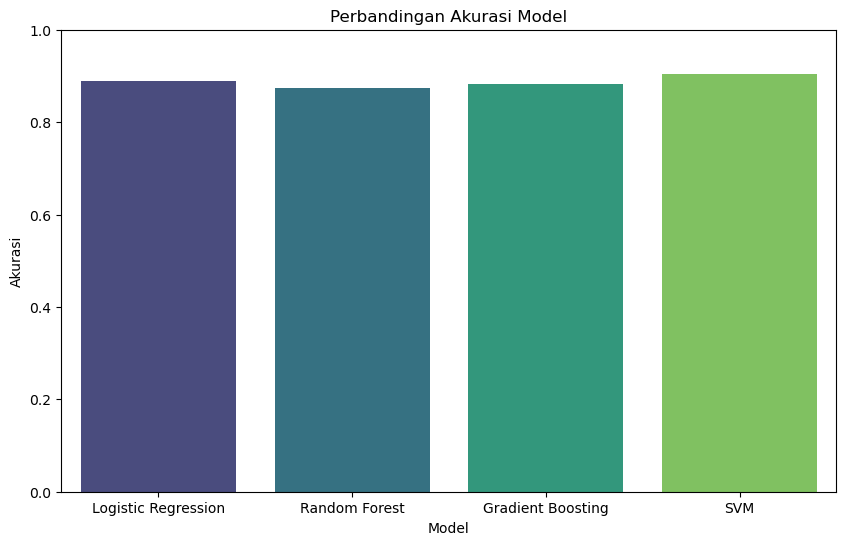

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=200, solver='lbfgs')),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
}

accuracies = {}

# Iterasi untuk setiap model
for model_name in models:
    model = models[model_name]
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Membuat bar plot untuk membandingkan akurasi model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)  # Menetapkan batas y dari 0 hingga 1
plt.show()


In [25]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Akurasi {name}: {accuracy}')

Akurasi Logistic Regression: 0.89
Akurasi Random Forest: 0.8733333333333333
Akurasi Gradient Boosting: 0.8833333333333333
Akurasi SVM: 0.9033333333333333


Berdasarkan perbandingan antar 4 model prediksi tersebut, Support Vector Machines (SVM) memiliki nilai akurasi paling tinggi sehingga untuk memprediksi nilai kepuasaan pelanggan secara keseluruhan akan menggunakan model Support Vector Machines (SVM)

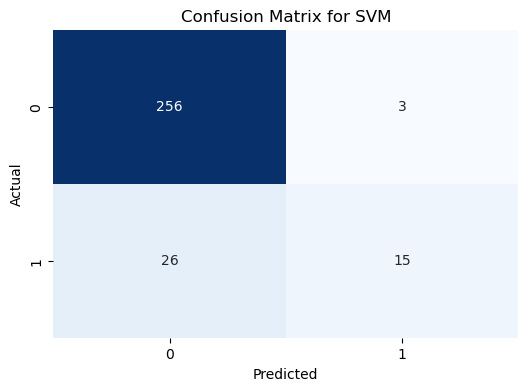

In [28]:
from sklearn.metrics import confusion_matrix

y_pred_svm = models['SVM'].predict(X_test)

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


__Baris pertama (nilai Actual = 0) menunjukkan:__<br>
- 256 prediksi benar untuk kelas 0 – artinya model memprediksi kelas 0 dengan benar sebanyak 256 kali.
- 3 prediksi salah untuk kelas 0 – artinya model memprediksi kelas 1 padahal seharusnya kelas 0 sebanyak 3 kali.

__Baris kedua (nilai Actual = 1) menunjukkan:__<br>
- 26 prediksi salah untuk kelas 1 – artinya model memprediksi kelas 0 padahal seharusnya kelas 1 sebanyak 26 kali.
- 15 prediksi benar untuk kelas 1 – artinya model memprediksi kelas 1 dengan benar sebanyak 15 kali.

## VI. Kesimpulan

__Frekuensi Waktu Kunjungan Pelanggan__
- Visualisasi: Dengan menggunakan bar chart, kami dapat menggambarkan frekuensi waktu kunjungan pelanggan, seperti sarapan, makan siang, dan makan malam. Bar chart menunjukkan waktu makan yang paling ramai di restoran, membantu dalam merencanakan jadwal staf dan persediaan makanan sesuai dengan jam-jam sibuk.

__Karakteristik Demografis Pelanggan yang Sering Mengunjungi Restoran__
- Visualisasi: Pie chart menggambarkan distribusi pelanggan berdasarkan kelompok usia (anak, remaja, dewasa). Pie chart menunjukkan proporsi masing-masing kelompok usia yang sering mengunjungi restoran, memungkinkan restoran untuk menargetkan promosi dan penawaran berdasarkan kelompok usia yang dominan.

__Pengeluaran Rata-Rata Per Kunjungan Terkait dengan Jenis Masakan__
- Visualisasi: Bar plot menunjukkan bagaimana pengeluaran rata-rata bervariasi menurut jenis masakan yang disukai pelanggan. Bar plot membantu mengidentifikasi jenis masakan yang menghasilkan pengeluaran lebih tinggi dan dapat digunakan untuk merencanakan menu dan penawaran khusus yang lebih baik.

__Pengaruh Program Loyalitas Terhadap Rating__
- Visualisasi: Stacked bar plot menunjukkan perbedaan rating antara anggota dan non-anggota program loyalitas. Stacked bar plot mengungkapkan apakah anggota program loyalitas memberikan rating yang lebih tinggi, menunjukkan potensi manfaat dari program loyalitas dalam meningkatkan kepuasan pelanggan.

__Pengaruh Penilaian Layanan, Makanan, dan Suasana Terhadap Kepuasan Pelanggan__
- Visualisasi: Bar chart digunakan untuk menggambarkan hubungan antara penilaian layanan, makanan, dan suasana dengan tingkat kepuasan keseluruhan. Bar chart menunjukkan bagaimana penilaian di masing-masing kategori berkontribusi pada kepuasan pelanggan secara keseluruhan, memberikan wawasan untuk meningkatkan aspek-aspek yang kurang memuaskan.

__Prediksi Kepuasan Pelanggan Berdasarkan Variabel-Variabel Relevan__
- Model: Dengan menggunakan model machine learning (Logistic Regression, Random Forest, Gradient Boosting, SVM), akurasi model menunjukkan bahwa SVM memiliki performa terbaik dengan akurasi 0.90. Model SVM dapat digunakan untuk memprediksi kepuasan pelanggan dengan akurasi tinggi, membantu restoran dalam memahami dan meningkatkan faktor-faktor yang mempengaruhi kepuasan pelanggan.